In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
# read data
gpr_input = pd.read_csv("exp_gpr_input.csv", index_col=0)
gpr_output = pd.read_csv("exp_gpr_output.csv", index_col=0)
# merge data
gpr_data = pd.merge(gpr_input, gpr_output, left_index=True, right_index=True)
# add one more column which is absolute value of the difference between the noise_std and learned noise_std
gpr_data["noise_std_diff"] = np.abs(
    gpr_data["noise_std"] - gpr_data["learned_noise_std"])/gpr_data["noise_std"]

gpr_data

,noise_std,num_sample,problem,seed,progress,normalized_mae,normalized_rmse,r2,log_likelihood,learned_noise_std,cpu_time,noise_std_diff
0,0.1,20,Forrester_1a,1,finished,0.116636,0.032764,0.999638,616.532008,0.084439,0.413496,0.155609
1,0.3,20,Forrester_1a,1,finished,0.412507,0.096254,0.996877,-567.494581,0.436229,0.361976,0.454096
2,0.5,20,Forrester_1a,1,finished,0.294255,0.112438,0.995739,-894.836219,0.381957,0.319434,0.236086
3,0.1,30,Forrester_1a,1,finished,0.071075,0.023238,0.999818,718.535221,0.107317,0.497646,0.073172
4,0.3,30,Forrester_1a,1,finished,0.185918,0.076108,0.998048,-480.438947,0.403776,0.407562,0.345922
...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0.3,90,mf_Sixhump,5,finished,1.005498,0.057609,0.998250,-1109.926199,0.302174,3.866641,0.007245
1481,0.5,90,mf_Sixhump,5,finished,0.432264,0.069473,0.997455,-2400.717552,0.770952,3.284897,0.541903
1482,0.1,100,mf_Sixhump,5,finished,0.333909,0.027319,0.999606,753.574671,0.127585,6.249212,0.275854
1483,0.3,100,mf_Sixhump,5,finished,0.546363,0.048356,0.998767,-1125.512815,0.332597,4.803971,0.108655


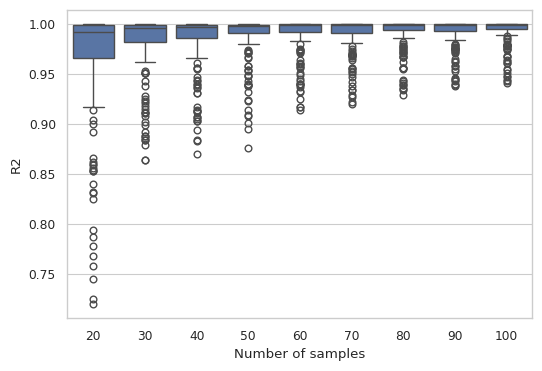

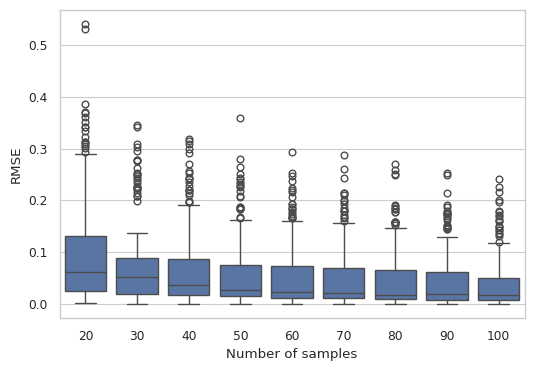

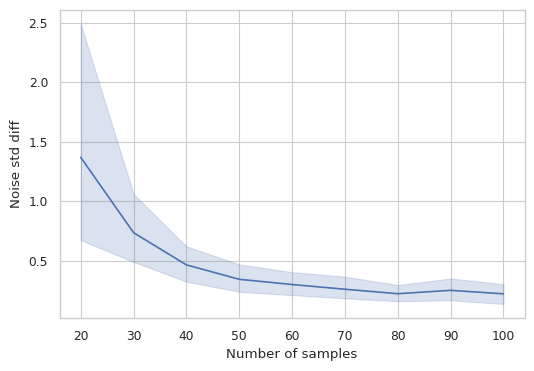

In [18]:
# plot r2 and rmse with respect to the num_sample use seaborn
sns.set_theme(style="whitegrid")
sns.set_context("paper")
# plot r2
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x="num_sample", y="r2", data=gpr_data)
ax.set_xlabel("Number of samples")
ax.set_ylabel("R2")
plt.savefig("r2.png", dpi=300)
# plot rmse
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x="num_sample", y="normalized_rmse", data=gpr_data)
ax.set_xlabel("Number of samples")
ax.set_ylabel("RMSE")
plt.show()
# plot noise_std_diff
plt.figure(figsize=(6, 4))
ax = sns.lineplot(x="num_sample", y="noise_std_diff", data=gpr_data)
ax.set_xlabel("Number of samples")
ax.set_ylabel("Noise std diff")
plt.show()